In [1]:
import numpy as np
import math
import keras
import matplotlib.pyplot as plt
import keras.backend as K
import sys
sys.path.insert(0, '../utils')
from utils import *
sys.path.insert(0,'../preprocessing')
from data_config import config as d_config
sys.path.insert(0, '../train')
from model_configs import get_weighted_bce
from keras.utils.generic_utils import get_custom_objects

Using TensorFlow backend.


In [2]:
#defining custom loss function
pos_weight = 8 #if using weighted binary crossentropy loss
weighted_bce = get_weighted_bce(pos_weight)
get_custom_objects().update({"weighted_bce": weighted_bce})

In [3]:
#load label model
folder = 'feed_forward_Wed_May_22_10-55-38_2019'
model_name = 'ep_1_tp_0.977_fp_0.107_f_1_0.933_f_2_0.959_chain_4_thresh_0.9'

flattened_input = True #change this depending on the model

model_name_split = model_name.split('_')
thresholds = [float(model_name_split[-1])]
chaining_dists = [float(model_name_split[-3])]
model = keras.models.load_model('../models/label_models/' + folder + '/' + model_name,
                               custom_objects={'loss': weighted_bce })

[0.9] [4.0]
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
correction_model = None

In [5]:
#run this cell if using correction model
def avgabs(y_true,y_pred): ##in seconds (if perturbation_max = 5*fs)
    return K.mean(K.abs(5*(y_true - y_pred)))

correction_model = keras.models.load_model('../models/correction_models/correction_model.h5', 
                                           custom_objects={'avgabs': avgabs})

OSError: Unable to open file (unable to open file: name = '../models/correction_models/correction_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [6]:
#get file numbers
data_config = d_config()

train = data_config.train_files
val = data_config.val_files
test = data_config.test_files

The true positive rate for tolerance  5  seconds is  0.977
The false positive rate for tolerance  5  seconds is  0.107
Total lunges in files:  300
Num correct lunges:  293
Num predicted lunges:  328
We overcount by  0
We are off by an average of this many seconds:  1.1511945392491465
The f_1 score is  0.933
The f_2 score is  0.959


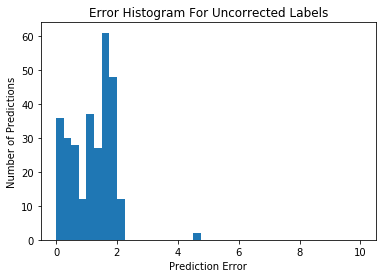

In [7]:
#run evaluation
tolerance_seconds = 5 
evaluation_files = val

model_metrics = get_model_metrics(evaluation_files, model, flattened_input, tolerance_seconds, 
                                  correction_model=correction_model, chaining_dists=chaining_dists, thresholds=thresholds)
print_model_metrics(model_metrics)